<a href="https://colab.research.google.com/github/Amol2332/eda-on-global-terrorism/blob/main/amol_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from matplotlib.ticker import ScalarFormatter
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#df1 = pd.read_csv('/content/drive/MyDrive/eda/Global Terrorism Data.csv')
#df.head()


#UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7127: invalid continuation byte

In [2]:
df = pd.read_csv('/content/drive/MyDrive/eda/Global Terrorism Data.csv', encoding = "ISO-8859-1")
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [5]:
# cleaning our dataset
# creating a list of columns where the null values are more than 75% and hence dropping them from our dataframe

null_value_list = [i for i in df.columns if df[i].isnull().sum() >= 150000]
print(null_value_list)
len(null_value_list)

['approxdate', 'resolution', 'alternative', 'alternative_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'guncertain2', 'guncertain3', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim', 'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt', 'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt', 'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt', 'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus', 'ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt', 'nreleased', 'addnotes', 'related']


68

In [6]:
# so there r total of 135 columns out of which 68 columns are such that they consist of more than 150000 of null values and hence we are droping those columns
df.drop(columns = null_value_list , axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 67 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  location          55495 non-null   object 
 16  summary           11

so now we still have 67 columns and we will now drop those columns which are kind of duplicates and are of no use to us

so now we drop the duplicates columns and the columns which do not make any sense to us

this can be done checking the value_counts method on each columns

so after all the data cleaning we will only use those columns which make sense to us and are useful for our analysis

following are the columns we will be performing our eda

Year , Month , Day , Country , Region , State ,  City , Latitude , longitude , Attack type ,  Killed , Wounded , Target , Summary of the incident in brief ,  Group , Target-type , Weapon type , Motive

In [7]:
df2 = df[['iyear','imonth', 'iday','country_txt','region_txt','provstate','city','latitude','longitude','attacktype1_txt','nkill','nwound','targtype1_txt','motive','weaptype1_txt']]
df2.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,attacktype1_txt,nkill,nwound,targtype1_txt,motive,weaptype1_txt
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Private Citizens & Property,NaN,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,Government (Diplomatic),NaN,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Journalists & Media,NaN,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,Government (Diplomatic),NaN,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,Government (Diplomatic),NaN,Incendiary


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   country_txt      181691 non-null  object 
 4   region_txt       181691 non-null  object 
 5   provstate        181270 non-null  object 
 6   city             181257 non-null  object 
 7   latitude         177135 non-null  float64
 8   longitude        177134 non-null  float64
 9   attacktype1_txt  181691 non-null  object 
 10  nkill            171378 non-null  float64
 11  nwound           165380 non-null  float64
 12  targtype1_txt    181691 non-null  object 
 13  motive           50561 non-null   object 
 14  weaptype1_txt    181691 non-null  object 
dtypes: float64(4), int64(3), object(8)
memory usage: 20.8+ MB


In [10]:
# renaming the column for our convenience and better understanding
df2.rename(columns = {'iyear':'year','imonth':'month', 'iday':'day','country_txt':'country','region_txt':'region','provstate':'state','attacktype1_txt':'attack','nkill':'kill','nwound':'wounded','targtype1_txt':'target','weaptype1_txt':'weapon'}, inplace =True)
df2.head()

,year,month,day,country,region,state,city,latitude,longitude,attack,kill,wounded,target,motive,weapon
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Private Citizens & Property,NaN,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,Government (Diplomatic),NaN,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Journalists & Media,NaN,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,Government (Diplomatic),NaN,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,Government (Diplomatic),NaN,Incendiary


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       181691 non-null  int64  
 1   month      181691 non-null  int64  
 2   day        181691 non-null  int64  
 3   country    181691 non-null  object 
 4   region     181691 non-null  object 
 5   state      181270 non-null  object 
 6   city       181257 non-null  object 
 7   latitude   177135 non-null  float64
 8   longitude  177134 non-null  float64
 9   attack     181691 non-null  object 
 10  kill       171378 non-null  float64
 11  wounded    165380 non-null  float64
 12  target     181691 non-null  object 
 13  motive     50561 non-null   object 
 14  weapon     181691 non-null  object 
dtypes: float64(4), int64(3), object(8)
memory usage: 20.8+ MB


In [11]:
df2.corr()

,year,month,day,latitude,longitude,kill,wounded
year,1.000000,0.000139,0.018254,0.166933,0.003917,0.015341,0.015273
month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.003463,0.002938
day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003693,-0.001268
latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.018124,0.015988
longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000562,0.000223
kill,0.015341,0.003463,-0.003693,-0.018124,-0.000562,1.000000,0.534375
wounded,0.015273,0.002938,-0.001268,0.015988,0.000223,0.534375,1.000000


In [12]:
df2.nunique()

# using the unique method we came to know that columns like attack,target, region, weapon used are the categorial columns
# this categorial columns will be beneficial for making some important inferences

year            47
month           13
day             32
country        205
region          12
state         2855
city         36674
latitude     48322
longitude    48039
attack           9
kill           205
wounded        238
target          22
motive       14490
weapon          12
dtype: int64

In [13]:
df2.year.value_counts()


2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: year, dtype: int64

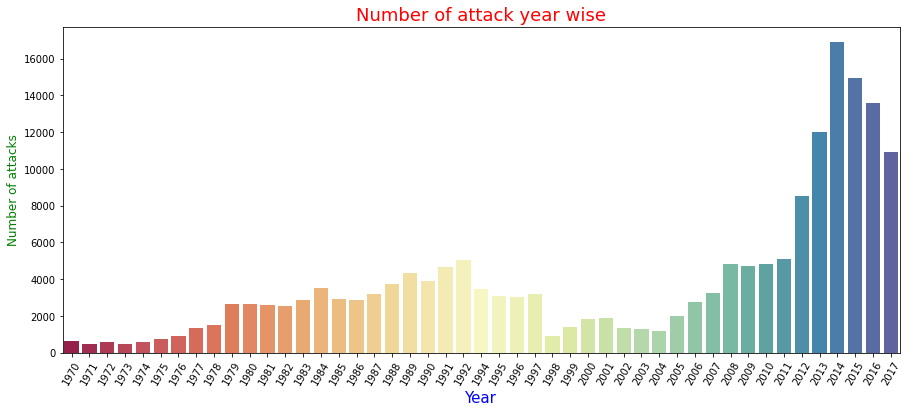

In [14]:
# the very first plot will be a countplot which gives a visual representation of the total number of attack in every year
plt.figure(figsize = (15,6))
sb.countplot('year',data = df2, palette='Spectral')
plt.xticks(rotation = 60)
plt.title('Number of attack year wise',fontsize=18).set_color('red')
plt.ylabel('Number of attacks',fontsize=12).set_color('green')
plt.xlabel('Year',fontsize=15).set_color('blue')
plt.show()

In [15]:
(df2.attack.value_counts()[:5].sum()/df2.attack.value_counts().sum())*100

94.52862277162876

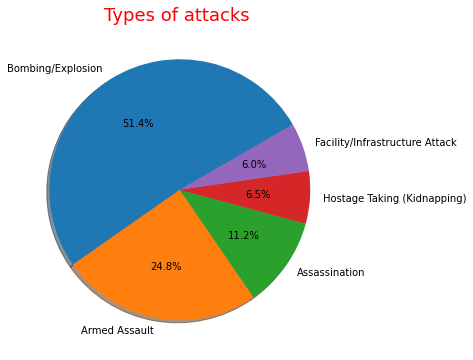

In [16]:
plt.figure(figsize = (15,6))
plt.pie(df2.attack.value_counts()[:5], labels=df2.attack.value_counts().keys()[:5], autopct='%1.1f%%',shadow=True, startangle=30)
plt.title('Types of attacks ', fontsize = 18).set_color('red')
plt.show()

In [ ]:
fig = px.choropleth(df, locations="country",
color="guest",
hover_name="arrival_date_year",
animation_frame="market_segment",
title = "Fare of hotels in Different Country